# K-Means Clustering

### What is clustering?
An unsupervised learning technique to group unlabelled data into meaningful clusters. The clusters share some similarity. Data in different clusters are dissimilar from each other.

Different factors affect the number of clusters:
- data distribution, data density
- the purpose of clustering
- evaluation metrics (such as silhouette score)

Many types of clustering
- K-Means clustering
- Agglomerative clustering
- Expectation Maximization
- density-based spatial clustering
- affinity propagation

Main applications of clustering are
- data reduction
- outlier detection
- developing hypotheses (e.g., about the relationships between clusters found in the data)

### Steps in K-Means Clustering
1. Decide on the number of clusters K.
- Can be determined by assumptions
- Unknown at the beginning so can test various values and choose the one that works best
- Elbow method and Silhouette method are ways to determine K
    - Elbow method: key concept is within-cluster sum of squares (WCSS) which refers to total variation within a cluster. It is sum of squared errors for different values of K. As the number of clusters increases, the sum of squared distances between data points and cluster centroids will decrease. Graphing this for different values of K provides an 'elbow point', which can be chosen as the optimal value of K.
    - Silhouette method: Measures how similar a point is to its cluster in comparison with other clusters. Scores range from -1 to 1. A high value: point matches well to its own cluster, not to other clusters. Low value: the point could be assigned to a different cluster.

2. Select random data records to represent the centroids (central points) of the clusters.
3. Calculate the distances between each data record and the defined centroids. For each data record, assign it to the centroid that is the smallest Euclidean distance from that centroid. This can be calculated by the following equation:

$$d_{(ic)} = \sqrt{(x_{1,i} - x_{1,c})^{2} + (x_{2,i} - x_{2,c})^{2} + ... + (x_{M,i} - x_{M,c})^{2}}$$

where $(x_{1}, x_{2}, ..., x_{M})$ are the data variables, and $i$ denotes the $i^{th}$ data record, and $c$ denotes the cluster's centroid.

4. Recalculate a new centroid for each cluster by averaged the included data records.
5. Repeat steps 3 and 4 until there are no further changes in the calculated centroids.

### Example K-Means Clustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = [
    {'X1': 1, 'X2': 1},
    {'X1': 1.5, 'X2': 2},
    {'X1': 3, 'X2': 4},
    {'X1': 5, 'X2': 7},
    {'X1': 3.5, 'X2': 5},
    {'X1': 4.5, 'X2': 5},
    {'X1': 3.5, 'X2': 4.5},
]
df = pd.DataFrame(data)
print(df)

    X1   X2
0  1.0  1.0
1  1.5  2.0
2  3.0  4.0
3  5.0  7.0
4  3.5  5.0
5  4.5  5.0
6  3.5  4.5


Step 1: Inspecting the plot below suggests K = 3 might be a good number for K to start the clustering.

Step 2: Highlight three points to be the centroids of each cluster.

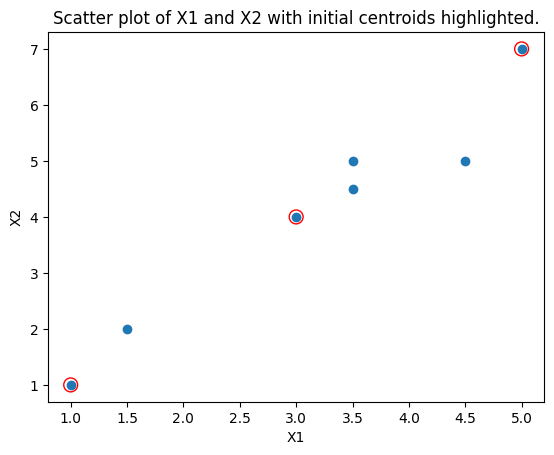

In [9]:
plt.scatter(df['X1'], df['X2'])
highlight_points = [(1,1), (3,4), (5, 7)]
highlight_x = [point[0] for point in highlight_points]
highlight_y = [point[1] for point in highlight_points]
plt.scatter(highlight_x, highlight_y, s=100, facecolors='none', edgecolors='red')
plt.title("Scatter plot of X1 and X2 with initial centroids highlighted.")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Step 3: Calculate the Euclidean distance between each data record and the defined centroid. For example, for data record number 2 (1.5, 2.0), we can calculate the Euclidean distance of this point from each centroid. Centroid $c_{1}$ is as $(1,1)$, centroid $c_{2}$ is at $(3, 4)$ and centroid $c_{3}$ is at $(5, 7)$

$$d_{(2, c_{1})} = \sqrt{(1.5-1)^{2} + (2-1)^{2}} = 1.8$$
$$d_{(2, c_{1})} = \sqrt{(1.5-3)^{2} + (2-4)^{2}} = 2.5$$
$$d_{(2, c_{1})} = \sqrt{(1.5-5)^{2} + (2-7)^{2}} = 6.1$$

Since the smallest Euclidean distance is 1.8, this data record is assigned to cluster $c_{1}$.

Repeating this for the remaining records we find the following:

In [11]:
import numpy as np
centroids = [(1,1), (3,4), (5,7)]

# Calculate Euclidean distances to each centroid
for i, centroid in enumerate(centroids):
    df[f'distance_to_centroid_{i+1}'] = np.sqrt((df['X1'] - centroid[0])**2 + (df['X2'] - centroid[1])**2)

# Assign each point to the closest centroid
df['closest_centroid'] = df[['distance_to_centroid_1', 'distance_to_centroid_2', 'distance_to_centroid_3']].idxmin(axis=1)
# Remove 'distance_to_centroid_' prefix to only keep centroid number in 'closest_centroid'
df['closest_centroid'] = df['closest_centroid'].apply(lambda x: int(x.split('_')[-1]))
print(df)

    X1   X2  distance_to_centroid_1  distance_to_centroid_2  \
0  1.0  1.0                0.000000                3.605551   
1  1.5  2.0                1.118034                2.500000   
2  3.0  4.0                3.605551                0.000000   
3  5.0  7.0                7.211103                3.605551   
4  3.5  5.0                4.716991                1.118034   
5  4.5  5.0                5.315073                1.802776   
6  3.5  4.5                4.301163                0.707107   

   distance_to_centroid_3  closest_centroid  
0                7.211103                 1  
1                6.103278                 1  
2                3.605551                 2  
3                0.000000                 3  
4                2.500000                 2  
5                2.061553                 2  
6                2.915476                 2  


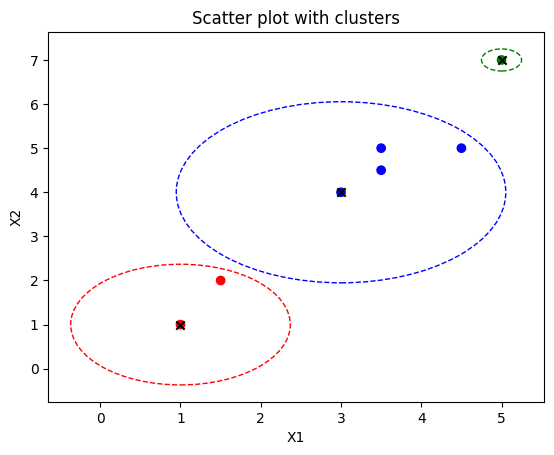

In [14]:
# Scatter plot of all data points, colored by closest centroid
colors = {1: 'red', 2: 'blue', 3: 'green'}
plt.scatter(df['X1'], df['X2'], c=df['closest_centroid'].map(colors))

# Draw circles around each cluster
for i, (x_center, y_center) in enumerate(centroids):
    # Select the points that belong to the current centroid
    cluster_points = df[df['closest_centroid'] == i + 1]

    # Calculate the radius as the maximum distance from the centroid to its cluster points
    max_distance = cluster_points[f'distance_to_centroid_{i+1}'].max() + 0.25

    # Draw a circle around the cluster
    circle = plt.Circle((x_center, y_center), max_distance, color=colors[i+1], fill=False, linestyle="--", linewidth=1)
    plt.gca().add_patch(circle)

# Plot centroids
for x, y in centroids:
    plt.scatter(x, y, c='black', marker='x')

plt.title("Scatter plot with clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Step 4: Recalculate a new centroid for each cluster by averaging its included data records.

For $c_{1}$, the centroid is:
$$(\frac{1}{2}(1+1.5, 1+2)) = (1.25, 1.5)$$

For $c_{2}$, the centroid is:
$$(\frac{1}{4}(3+3.5+3.5+4.5, 4+4.5+5+5)) = (3.625, 4.625)$$

For $c_{3}$, the centroid remains:
$$(5, 7)$$

In [13]:
new_centroids = df.groupby('closest_centroid')[['X1', 'X2']].mean().reset_index()
print(new_centroids)

   closest_centroid     X1     X2
0                 1  1.250  1.500
1                 2  3.625  4.625
2                 3  5.000  7.000


Then we can repeat the calculations from above using the new centroid locations to calculate the Euclidean distance. We do this until the positions of the centroids do not vary much.